# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup **
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
import datetime as dt
import requests

#weatherAPIKey = "444914521cafc2f13469a6c401b0fd7d"
weatherBASEUrl = "https://api.openweathermap.org/data/2.5/weather?"
#API_KEY = open('weatherAPI_keys.txt', 'r').read()
CITY = "London"

finalWeatherURL = weatherBASEUrl + "appid=" + weather_api_key + "&q=" + CITY
response = requests.get(finalWeatherURL).json()
print(response)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 279.2, 'feels_like': 278.24, 'temp_min': 277.69, 'temp_max': 280.98, 'pressure': 1030, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 240}, 'clouds': {'all': 30}, 'dt': 1702613363, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1702627169, 'sunset': 1702655492}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [6]:
url = weatherBASEUrl + "appid=" + weather_api_key
print(url)
city = "Paris"
unitIn = "metric"
city_url = url + "&q=" + city + "&units=" + unitIn
print(city_url)

https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&q=Paris&units=metric


In [15]:
# Set the API base URL
#url = # "https://api.openweathermap.org/data/2.5/weather?"
weatherBASEUrl = "https://api.openweathermap.org/data/2.5/weather?"
unitIn = "metric"
url = weatherBASEUrl + "appid=" + weather_api_key + "&units=" + unitIn
print(url)


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#        {"coord":{"lon":2.3488,"lat":48.8534}}]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
       # print(city_country)
       # city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_date = city_weather["dt"]
        
        #print(city_date)

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                         "Date": city_date})
       # print(city_data)

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric
Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=adamstown
Processing Record 1 of Set 1 | adamstown
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=puerto natales
Processing Record 2 of Set 1 | puerto natales
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=taco pozo
Processing Record 3 of Set 1 | taco pozo
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=grytviken
Processing Record 4 of Set 1 | grytviken
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=taiohae
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
'coord'
https://api.openweathermap.org/da

https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=lisala
Processing Record 3 of Set 2 | lisala
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=bangar
Processing Record 4 of Set 2 | bangar
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=albany
Processing Record 5 of Set 2 | albany
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=ambovombe
Processing Record 6 of Set 2 | ambovombe
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=charters towers
Processing Record 7 of Set 2 | charters towers
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=utrik
Processing Record 8 of Set 2 | utrik
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=met

https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=okhotsk
Processing Record 8 of Set 3 | okhotsk
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=quellon
Processing Record 9 of Set 3 | quellon
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=kayangel
Processing Record 10 of Set 3 | kayangel
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=ofunato
Processing Record 11 of Set 3 | ofunato
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=ouro preto do oeste
Processing Record 12 of Set 3 | ouro preto do oeste
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=rio grande
Processing Record 13 of Set 3 | rio grande
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f1

https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=cestos city
Processing Record 14 of Set 4 | cestos city
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=aktau
Processing Record 15 of Set 4 | aktau
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=palm valley
Processing Record 16 of Set 4 | palm valley
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=gueltat zemmour
Processing Record 17 of Set 4 | gueltat zemmour
City not found. Skipping...
'coord'
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=briare
Processing Record 18 of Set 4 | briare
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=chernyshevskiy
Processing Record 19 of Set 4 | chernyshevskiy
https://api.openweatherm

https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=kristiansund
Processing Record 18 of Set 5 | kristiansund
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=kyparissia
Processing Record 19 of Set 5 | kyparissia
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=howrah
Processing Record 20 of Set 5 | howrah
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=kulia village
Processing Record 21 of Set 5 | kulia village
City not found. Skipping...
'coord'
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=radford
Processing Record 22 of Set 5 | radford
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=petropavlovsk-kamchatsky
Processing Record 23 of Set 5 | petropavlovsk-kamchatsky
http

https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=papatowai
Processing Record 23 of Set 6 | papatowai
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=yung shue wan
Processing Record 24 of Set 6 | yung shue wan
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=pisco
Processing Record 25 of Set 6 | pisco
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=marka
Processing Record 26 of Set 6 | marka
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=san luis de la loma
Processing Record 27 of Set 6 | san luis de la loma
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=vila do maio
Processing Record 28 of Set 6 | vila do maio
https://api.openweathermap.org/data/2.5/weather?appid=4449

https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=fuvahmulah
Processing Record 28 of Set 7 | fuvahmulah
City not found. Skipping...
'coord'
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=port alfred
Processing Record 29 of Set 7 | port alfred
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=sofifi
Processing Record 30 of Set 7 | sofifi
City not found. Skipping...
'coord'
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=samoylovka
Processing Record 31 of Set 7 | samoylovka
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=galappo
Processing Record 32 of Set 7 | galappo
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=neryungri
Processing Record 33 of Set 7 | neryungri
https:

https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=san julian
Processing Record 33 of Set 8 | san julian
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=ahau
Processing Record 34 of Set 8 | ahau
City not found. Skipping...
'coord'
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=huayin
Processing Record 35 of Set 8 | huayin
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=burang
Processing Record 36 of Set 8 | burang
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=ad darb
Processing Record 37 of Set 8 | ad darb
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=sitka
Processing Record 38 of Set 8 | sitka
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f134

https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=bishkul
Processing Record 35 of Set 9 | bishkul
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=hanko
Processing Record 36 of Set 9 | hanko
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=weno
Processing Record 37 of Set 9 | weno
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=horta
Processing Record 38 of Set 9 | horta
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=slave lake
Processing Record 39 of Set 9 | slave lake
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=dila
Processing Record 40 of Set 9 | dila
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=aguas vermel

https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=devinuwara
Processing Record 38 of Set 10 | devinuwara
City not found. Skipping...
'coord'
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=alofi
Processing Record 39 of Set 10 | alofi
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=hadibu
Processing Record 40 of Set 10 | hadibu
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=batang
Processing Record 41 of Set 10 | batang
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=thinadhoo
Processing Record 42 of Set 10 | thinadhoo
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=saurimo
Processing Record 43 of Set 10 | saurimo
https://api.openweathermap.org/data/2.5/weather?appid=44

https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=crawfordsville
Processing Record 42 of Set 11 | crawfordsville
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=kailua-kona
Processing Record 43 of Set 11 | kailua-kona
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=gamba
Processing Record 44 of Set 11 | gamba
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=woolgoolga
Processing Record 45 of Set 11 | woolgoolga
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=merritt island
Processing Record 46 of Set 11 | merritt island
https://api.openweathermap.org/data/2.5/weather?appid=444914521cafc2f13469a6c401b0fd7d&units=metric&q=kununurra
Processing Record 47 of Set 11 | kununurra
https://api.openweathermap.org/data/2.5/weather?appi

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(5)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [17]:
len(city_data)

560

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Adamstown,-25.0660,-130.1015,23.25,84,12,5.85,PN,1702613578
1,Puerto Natales,-51.7236,-72.4875,4.41,91,88,1.47,CL,1702613588
2,Taco Pozo,-25.6167,-63.2833,25.40,80,100,2.19,AR,1702613706
3,Grytviken,-54.2811,-36.5092,3.07,71,2,1.78,GS,1702613578
4,Anadyr,64.7500,177.4833,-10.72,85,40,15.00,RU,1702613686


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
    
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Adamstown,-25.0660,-130.1015,23.25,84,12,5.85,PN,1702613578
1,Puerto Natales,-51.7236,-72.4875,4.41,91,88,1.47,CL,1702613588
2,Taco Pozo,-25.6167,-63.2833,25.40,80,100,2.19,AR,1702613706
3,Grytviken,-54.2811,-36.5092,3.07,71,2,1.78,GS,1702613578
4,Anadyr,64.7500,177.4833,-10.72,85,40,15.00,RU,1702613686


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [13]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

<Figure size 432x288 with 0 Axes>

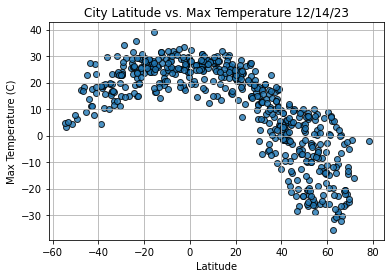

In [22]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lats,  # sets x_axis
            max_temps,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("output_data/Fig1.png")

# Show plot.
plt.show()

#### Latitude Vs. Humidity

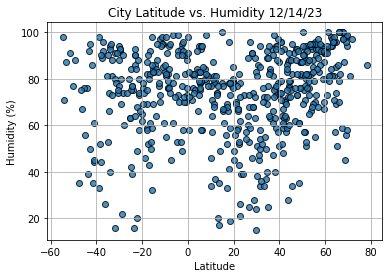

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,  # sets x_axis
            humidity,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

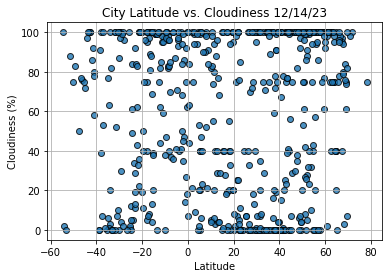

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,  # sets x_axis
            cloudiness,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

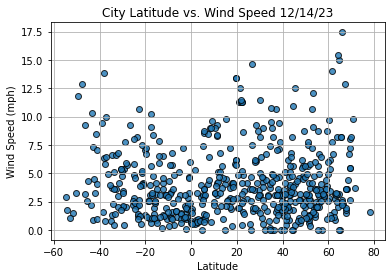

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,  # sets x_axis
            wind_speed,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
from scipy.stats import linregress
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
def plot_linear_regression(xVals, yVals, title, yLabel, textCoordinates):

# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(xVals, yVals)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = xVals * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(xVals,yVals)
    plt.plot(xVals,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, textCoordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(yLabel)
    plt.show()   


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,Anadyr,64.7500,177.4833,-10.72,85,40,15.00,RU,1702613686
6,Whitehorse,60.7161,-135.0538,0.43,93,100,6.17,CA,1702613675
7,Haverfordwest,51.8017,-4.9691,8.36,80,100,3.70,GB,1702613698
12,Ascension,30.2169,-90.9001,15.00,51,0,3.09,US,1702613709
13,Hachinohe,40.5000,141.5000,1.00,96,100,1.20,JP,1702613709


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
    

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Adamstown,-25.0660,-130.1015,23.25,84,12,5.85,PN,1702613578
1,Puerto Natales,-51.7236,-72.4875,4.41,91,88,1.47,CL,1702613588
2,Taco Pozo,-25.6167,-63.2833,25.40,80,100,2.19,AR,1702613706
3,Grytviken,-54.2811,-36.5092,3.07,71,2,1.78,GS,1702613578
5,Atafu Village,-8.5421,-172.5159,28.18,79,96,6.81,TK,1702613593


###  Temperature vs. Latitude Linear Regression Plot

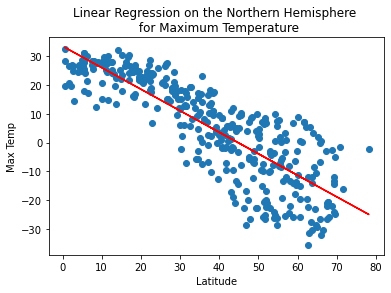

In [37]:
# Linear regression on Northern Hemisphere
xVals = northern_hemi_df["Lat"]
yVals = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(xVals,
                       yVals,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

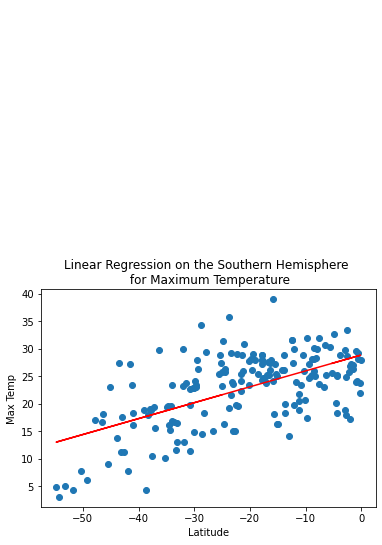

In [38]:
# Linear regression on Southern Hemisphere
xVals = southern_hemi_df["Lat"]
yVals = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(xVals,
                       yVals,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

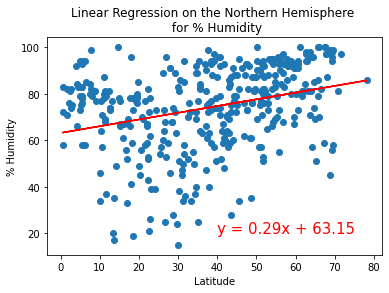

In [39]:
# Northern Hemisphere
xVals = northern_hemi_df["Lat"]
yVals = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(xVals,
                       yVals,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity",(40,20))

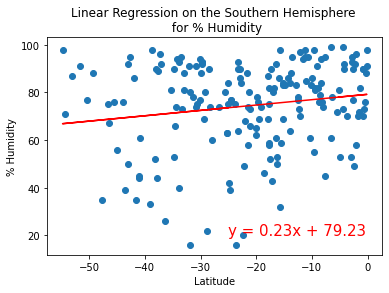

In [40]:
# Southern Hemisphere
xVals = southern_hemi_df["Lat"]
yVals = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(xVals,
                       yVals,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-25,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

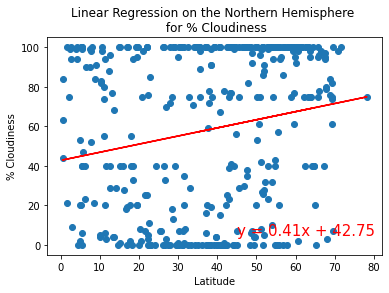

In [41]:
# Northern Hemisphere
xVals = northern_hemi_df["Lat"]
yVals = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(xVals,
                       yVals,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

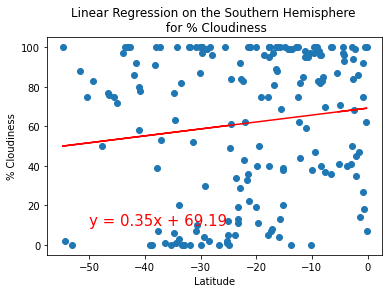

In [46]:
# Southern Hemisphere
xVals = southern_hemi_df["Lat"]
yVals = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(xVals,
                       yVals,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(-50,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

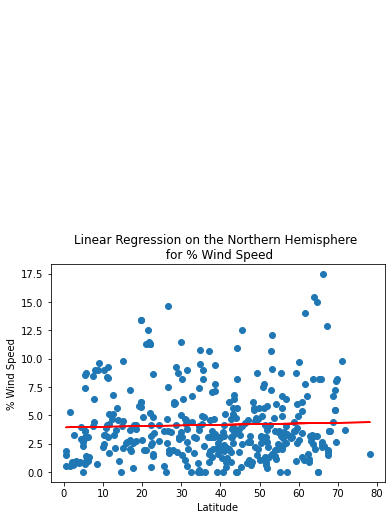

In [44]:
# Northern Hemisphere
xVals = northern_hemi_df["Lat"]
yVals = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(xVals,
                       yVals,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(10,40))

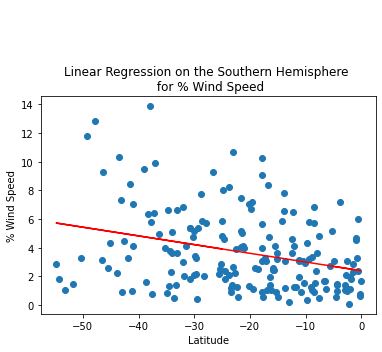

In [45]:
# Southern Hemisphere
xVals = southern_hemi_df["Lat"]
yVals = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(xVals,
                       yVals,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE